c:\Conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


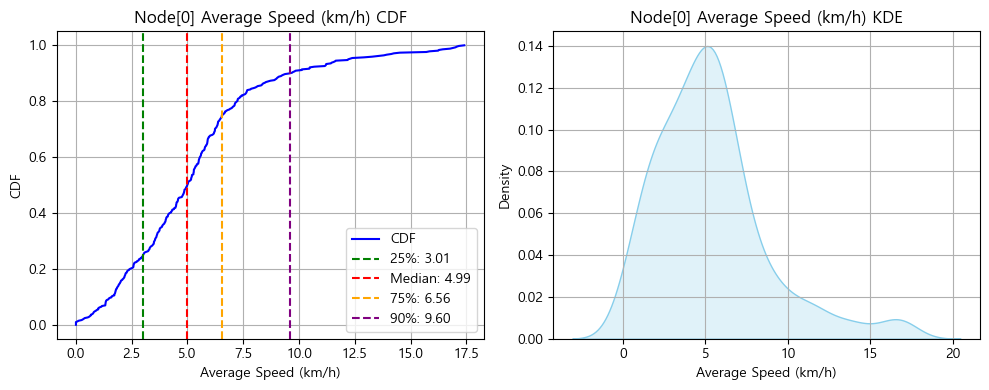

c:\Conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


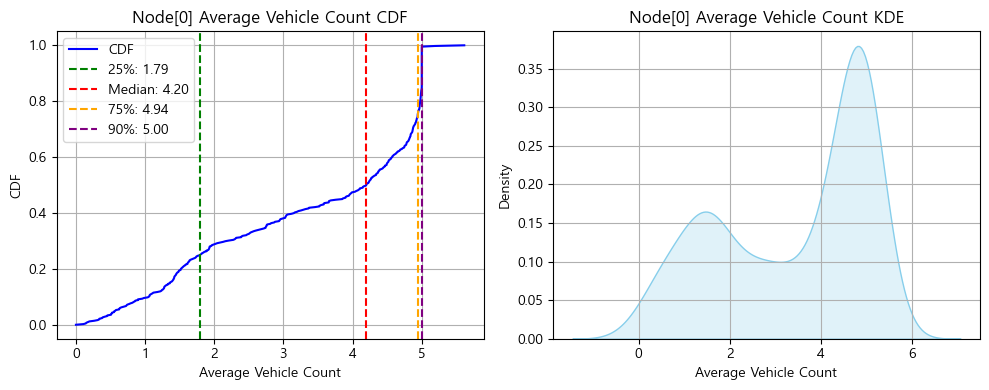

c:\Conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


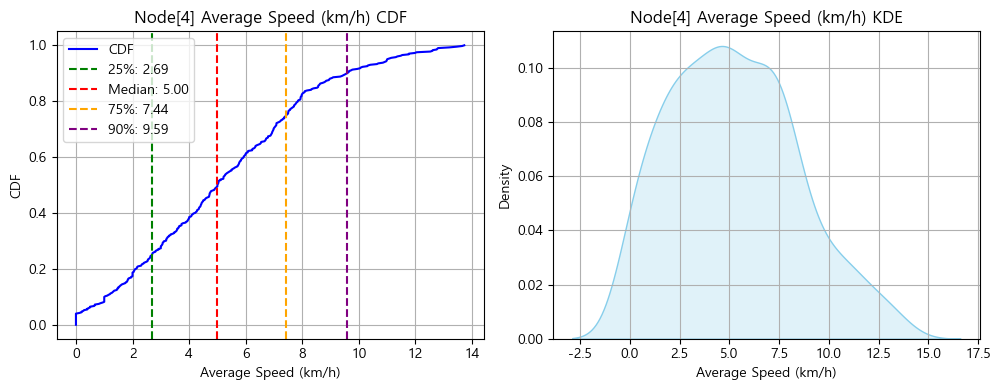

c:\Conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


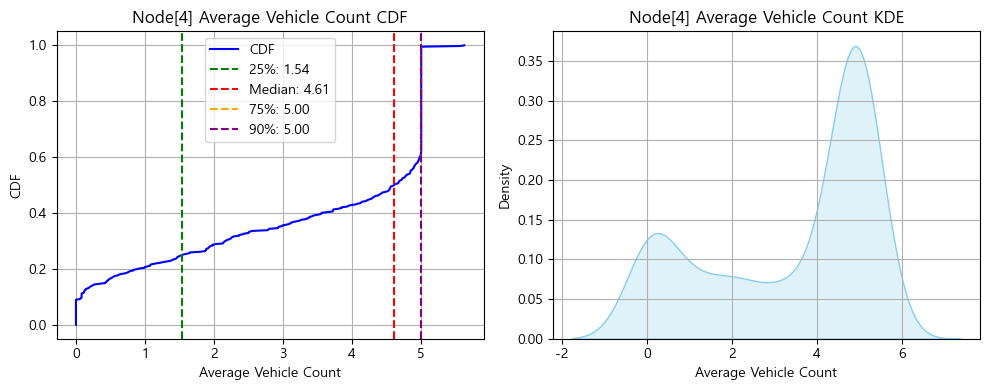

c:\Conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


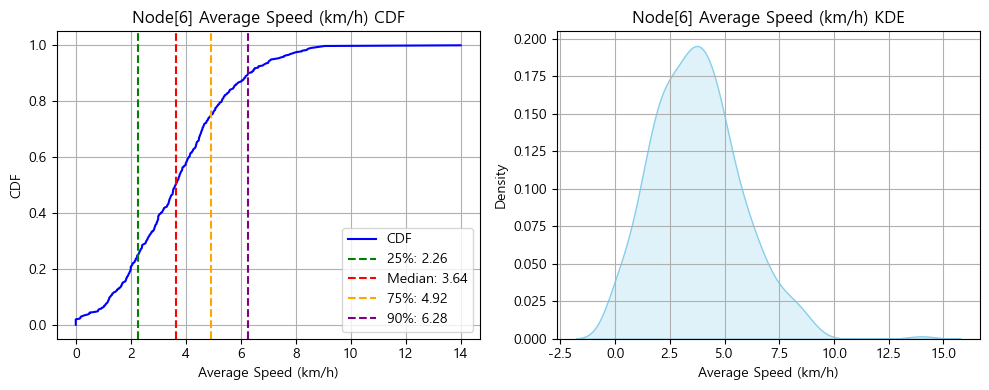

c:\Conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


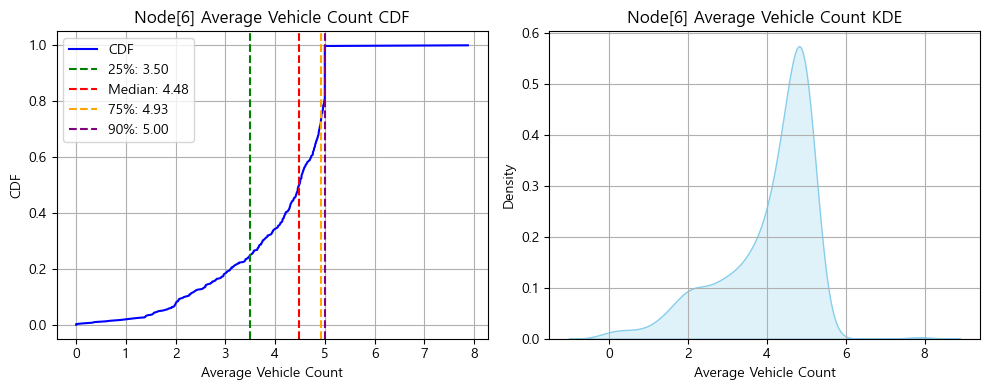

c:\Conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


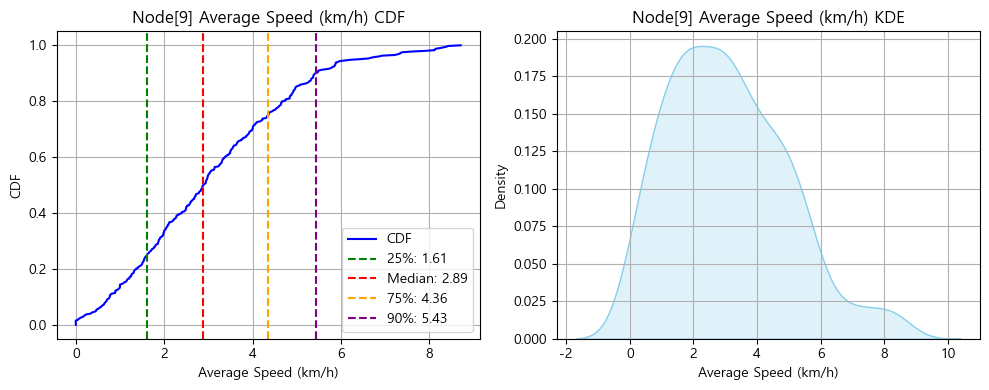

c:\Conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


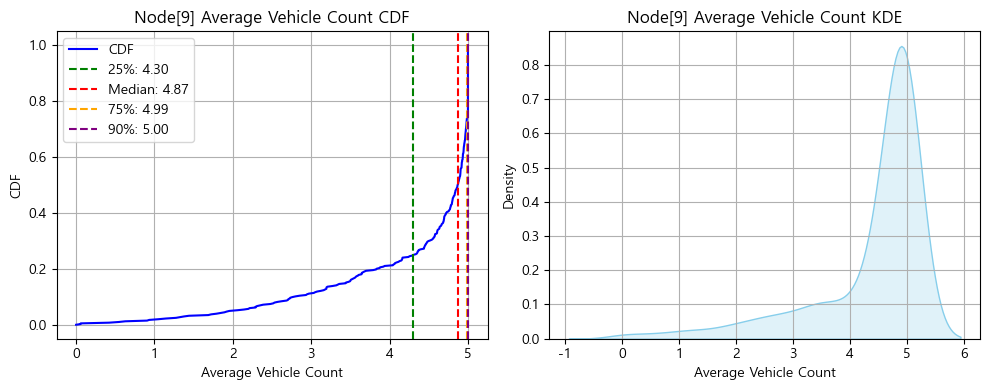

c:\Conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


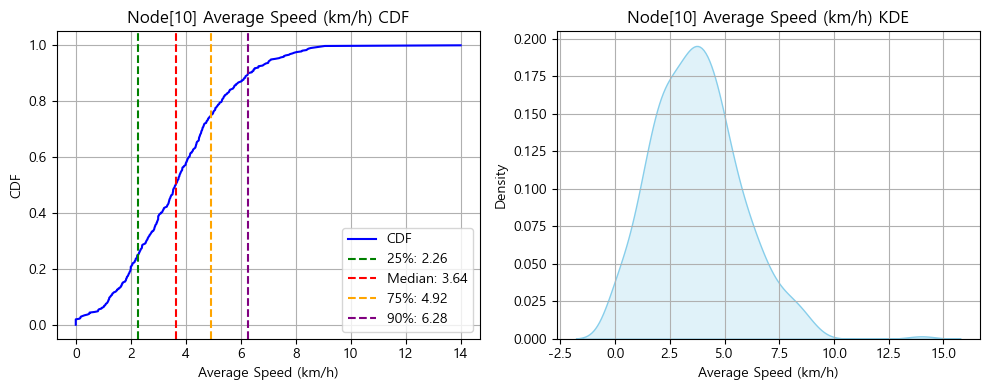

c:\Conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


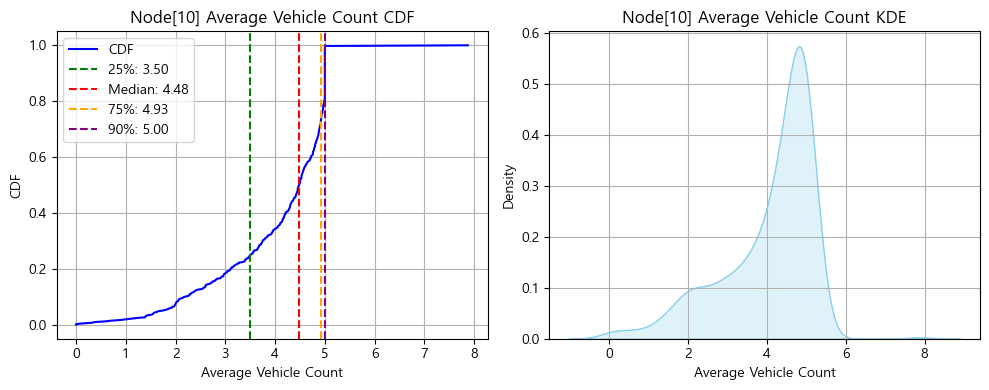

c:\Conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


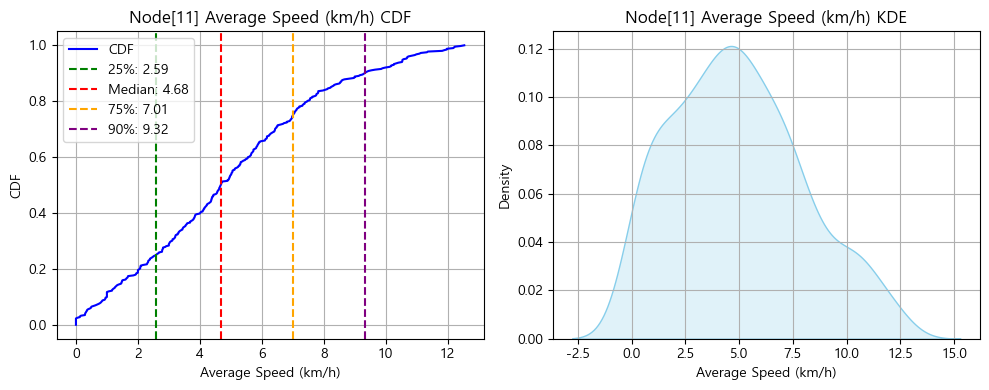

c:\Conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


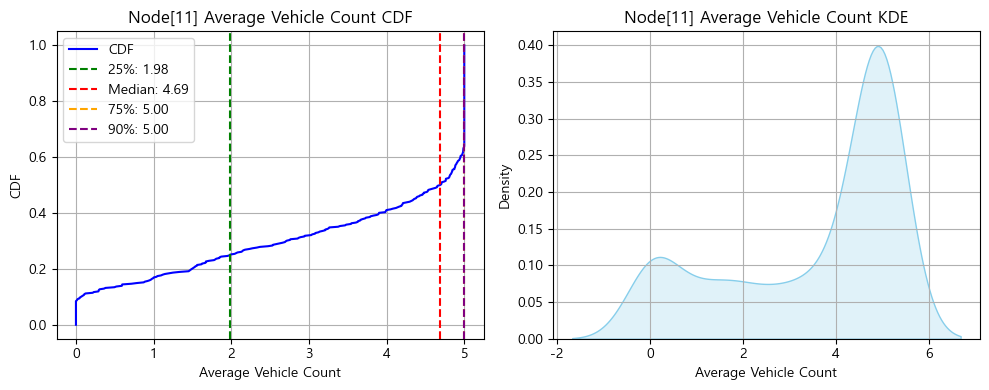

c:\Conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


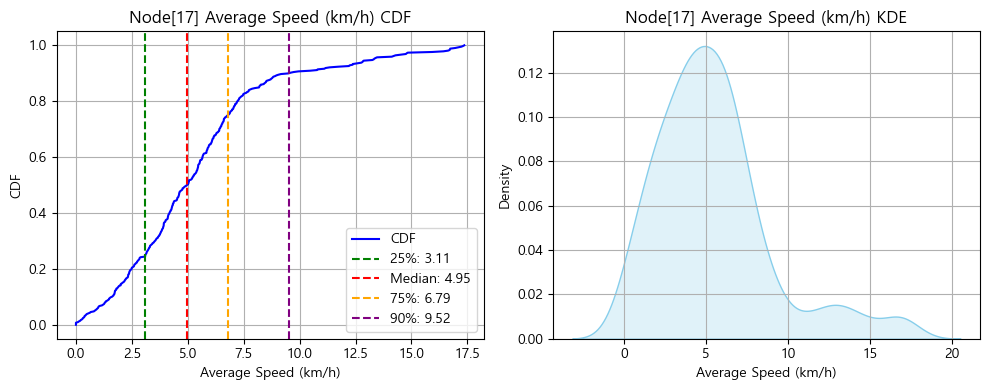

c:\Conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


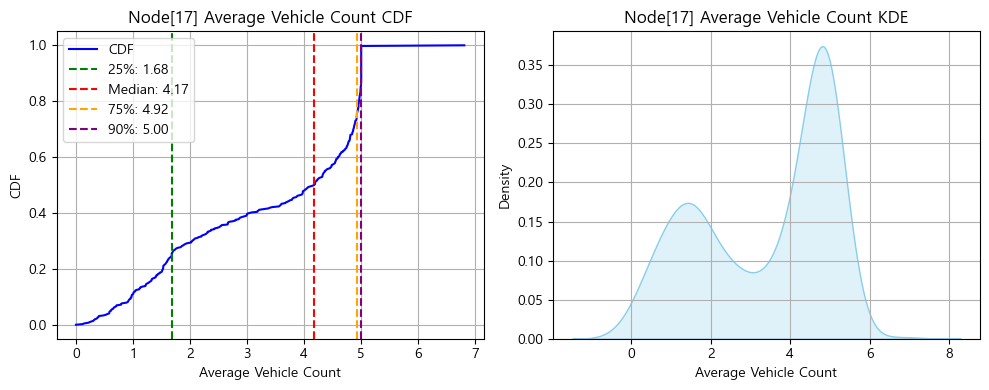

c:\Conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


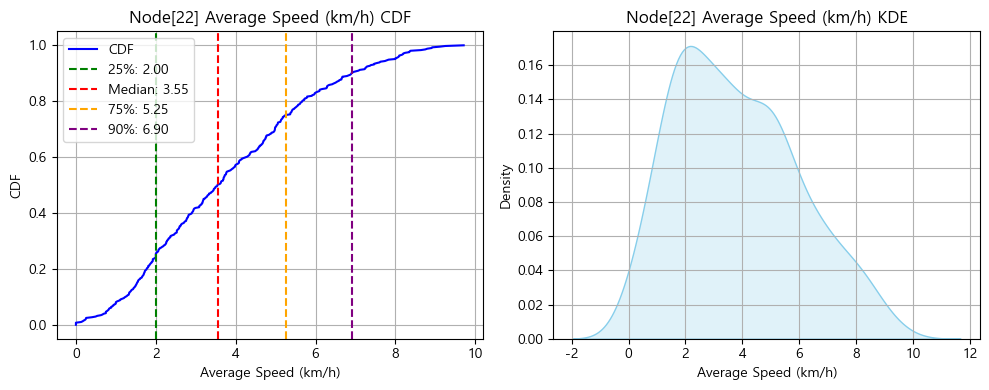

c:\Conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


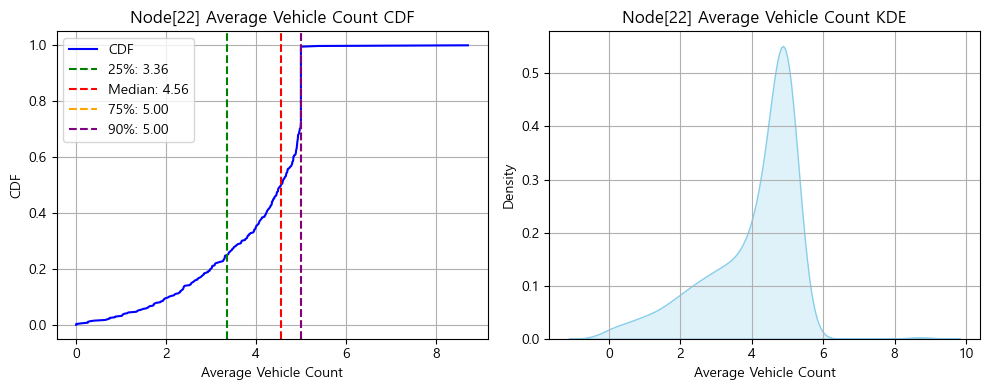

c:\Conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


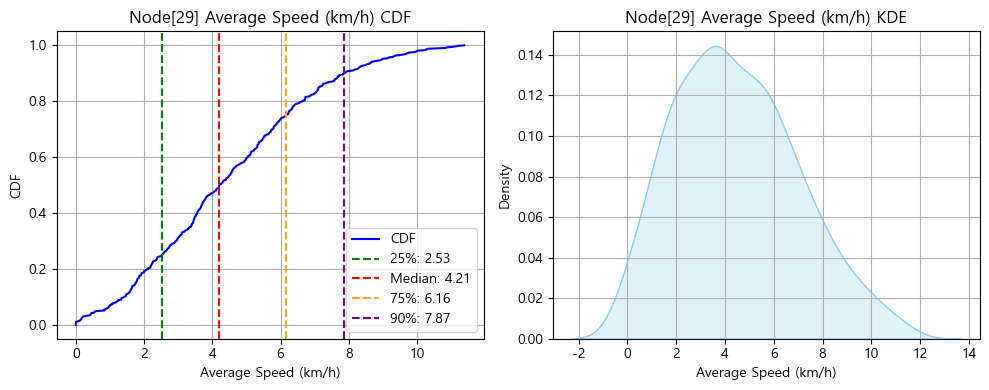

c:\Conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


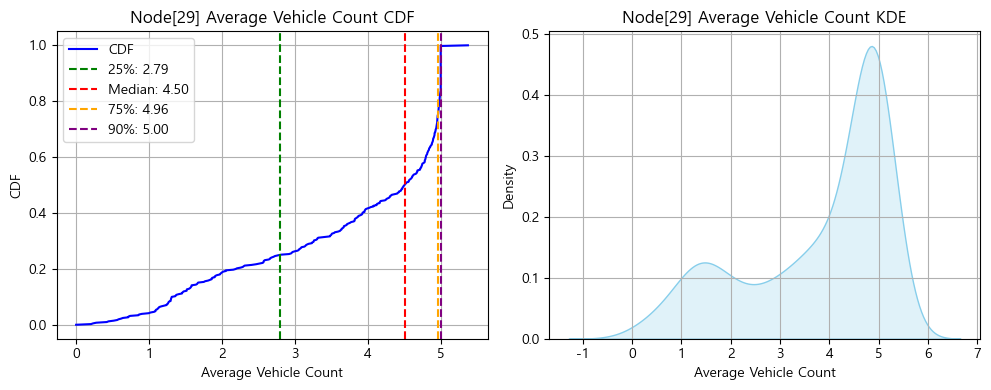

In [10]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

pwdP = "/L"
pwdD = "/D400"
pwdS = "/S20"
base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_04_25_AppSci_AODV_V02" + pwdP + pwdD + pwdS

node_list = [0, 4, 6, 9, 10, 11, 17, 22, 29]

summary = {}
all_node_speed_cdf = {}
all_node_vehicle_cdf = {}

def get_last_float(filepath):
    if not os.path.exists(filepath):
        return np.nan
    with open(filepath, 'r') as f:
        lines = f.readlines()
        if not lines:
            return np.nan
        try:
            return float(lines[-1].split(":")[-1].strip())
        except:
            return np.nan

for node_id in node_list:
    node_path = os.path.join(base_path, 'N' + f"{node_id}")
    vehicle_file = os.path.join(node_path, "vehicle_status.csv")

    avg_speed = avg_density = np.nan
    pdr = np.nan
    rreq_count = 0
    linkbreak_count = 0

    if os.path.exists(vehicle_file):
        df = pd.read_csv(vehicle_file, header=None)
        if df.shape[1] >= 5:
            df.columns = ['time', 'node', 'veh_count', 'speed', 'density']
            avg_speed = df['speed'].mean()
            avg_density = df['density'].mean()

            grouped = df.groupby('node').agg({
                'speed': 'mean',
                'veh_count': 'mean'
            }).reset_index()
            all_node_speed_cdf[node_id] = grouped['speed'].tolist()
            all_node_vehicle_cdf[node_id] = grouped['veh_count'].tolist()

    pdr = get_last_float(os.path.join(node_path, "PDR.txt"))

    rreq_file = os.path.join(node_path, "rreqCount.txt")
    rreq_count = sum(1 for _ in open(rreq_file)) if os.path.exists(rreq_file) else 0

    lb_file = os.path.join(node_path, "LinkBreakCount.txt")
    linkbreak_count = sum(1 for _ in open(lb_file)) if os.path.exists(lb_file) else 0

    summary[node_id] = {
        'Node': node_id,
        'PDR': pdr,
        'RREQ_Count': rreq_count,
        'LinkBreak_Count': linkbreak_count,
        'AvgSpeed': avg_speed,
        'AvgDensity': avg_density
    }

df_summary = pd.DataFrame(summary.values())
df_summary.to_csv("summary_result.csv", index=False)

def plot_cdf_with_kde(data_list, node_id, label):
    data = np.array(data_list)
    data = data[~np.isnan(data)]
    if len(data) == 0:
        print(f"[경고] Node[{node_id}] {label} 시각화할 데이터 없음")
        return

    q25 = np.percentile(data, 25)
    q50 = np.percentile(data, 50)
    q75 = np.percentile(data, 75)
    q90 = np.percentile(data, 90)

    sorted_data = np.sort(data)
    yvals = np.arange(1, len(sorted_data)+1) / float(len(sorted_data))

    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    plt.plot(sorted_data, yvals, label='CDF', color='blue')
    for q, label_txt, color in zip([q25, q50, q75, q90], ['25%', 'Median', '75%', '90%'],
                                   ['green', 'red', 'orange', 'purple']):
        plt.axvline(x=q, linestyle='--', color=color, label=f'{label_txt}: {q:.2f}')
    plt.xlabel(label)
    plt.ylabel('CDF')
    plt.title(f"Node[{node_id}] {label} CDF")
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 2, 2)
    sns.kdeplot(data, fill=True, color='skyblue')
    plt.xlabel(label)
    plt.ylabel('Density')
    plt.title(f"Node[{node_id}] {label} KDE")
    plt.grid(True)

    plt.tight_layout()
    plt.show()



for node_id in node_list:
    if node_id in all_node_speed_cdf:
        plot_cdf_with_kde(all_node_speed_cdf[node_id], node_id, "Average Speed (km/h)")
    if node_id in all_node_vehicle_cdf:
        plot_cdf_with_kde(all_node_vehicle_cdf[node_id], node_id, "Average Vehicle Count")



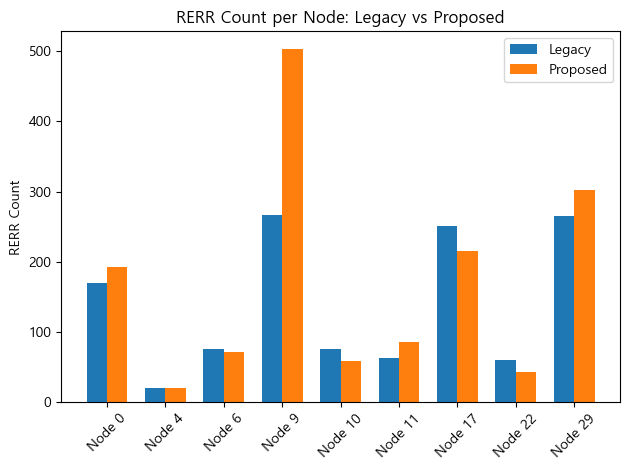

In [13]:
import os
import pandas as pd
import matplotlib.pyplot as plt

h_node = [0, 4, 6, 9, 10, 11, 17, 22, 29]

base_path_proposed = 'C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_04_25_AppSci_AODV_V02/P/D400/S20/N'
base_path_legacy = 'C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_04_25_AppSci_AODV_V02/L/D400/S20/N'

def compute_rerr_ratio(base_path, nodes):
    result = {}
    for node in nodes:
        node_path = os.path.join(base_path + str(node))
        rerr_file = os.path.join(node_path, 'rerr.txt')

        rerr_total = 0
        if os.path.isfile(rerr_file):
            with open(rerr_file, 'r') as f:
                rerr_total = len(f.readlines())
        result[node] = rerr_total
    return result

legacy_rerr = compute_rerr_ratio(base_path_legacy, h_node)
proposed_rerr = compute_rerr_ratio(base_path_proposed, h_node)

x = range(len(h_node))
width = 0.35

fig, ax = plt.subplots()
ax.bar([i - width / 2 for i in x], [legacy_rerr[n] for n in h_node], width=width, label='Legacy')
ax.bar([i + width / 2 for i in x], [proposed_rerr[n] for n in h_node], width=width, label='Proposed')

ax.set_xticks(x)
ax.set_xticklabels([f'Node {n}' for n in h_node])
ax.set_ylabel('RERR Count')
ax.set_title('RERR Count per Node: Legacy vs Proposed')
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


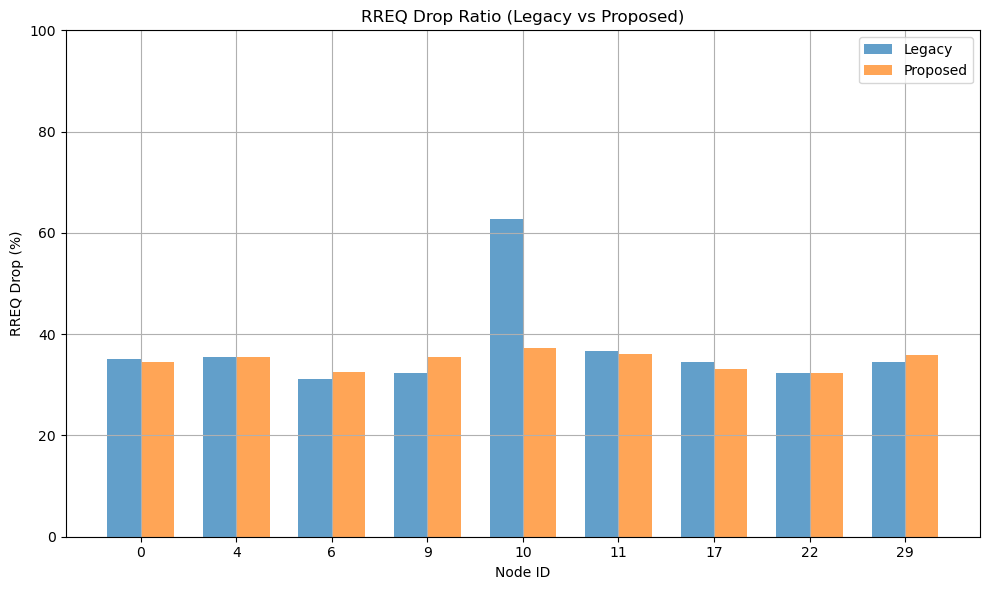

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

h_node = [0, 4, 6, 9, 10, 11, 17, 22, 29]

base_path_proposed = 'C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_04_25_AppSci_AODV_V02/P/D400/S20/N'
base_path_legacy = 'C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_04_25_AppSci_AODV_V02/L/D400/S20/N'

def compute_drop_ratio (base_path, nodes):
    drop_ratios = {}
    for node in nodes:
        node_path = os.path.join(base_path + str(node))
        send_log = os.path.join(node_path, 'sinr_all_log.csv')
        drop_log = os.path.join(node_path, 'sinr_drop_log.csv')
        
        if os.path.isfile(send_log):
            try:
                df_send = pd.read_csv(send_log, header=None, names=['Time', 'SINR', 'Packet', 'Dummy'], usecols=[0, 1, 2])
                df_send['Packet'] = df_send['Packet'].astype(str)
                rreq_sent = df_send['Packet'].str.contains('Rreq', case=False).sum()
            except Exception as e:
                print(f'Node {node} - Send log read error: {e}')
        
        if os.path.isfile(drop_log):
            try:
                df_drop = pd.read_csv(drop_log, names=[
                    'Time', 'SINR', 'Packet', 'TX_ID', 'RX_ID', 'X', 'Y', 'Z', 'None', 'Nearby', 'Total'
                ])
                df_drop['Packet'] = df_drop['Packet'].astype(str)
                rreq_drop = df_drop['Packet'].str.contains('Rreq', case=False).sum()
            except Exception as e:
                print(f"Node {node} - Drop log read error: {e}")
        drop_ratio = (rreq_drop / rreq_sent) * 100
        drop_ratios[node] = drop_ratio
    return drop_ratios

rreq_drop_legacy = compute_drop_ratio(base_path_legacy, h_node)
rreq_drop_proposed = compute_drop_ratio(base_path_proposed, h_node)

x = range(len(h_node))
bar_width = 0.35

plt.figure(figsize=(10, 6))
plt.bar([i - bar_width / 2 for i in x], [rreq_drop_legacy[n] for n in h_node], width=bar_width, label='Legacy', alpha=0.7)
plt.bar([i + bar_width / 2 for i in x], [rreq_drop_proposed[n] for n in h_node], width=bar_width, label='Proposed', alpha=0.7)
plt.xticks(x, h_node)
plt.xlabel('Node ID')
plt.ylabel('RREQ Drop (%)')
plt.title('RREQ Drop Ratio (Legacy vs Proposed)')
plt.ylim(0, 100)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Checking: C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_04_25_AppSci_AODV_V02/P/D400/S30\N0\aodv_send_log.csv
  → OK (hello=36346, total=43574)
Checking: C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_04_25_AppSci_AODV_V02/P/D400/S30\N4\aodv_send_log.csv
  → OK (hello=36612, total=42123)
Checking: C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_04_25_AppSci_AODV_V02/P/D400/S30\N6\aodv_send_log.csv
  → OK (hello=36714, total=41847)
Checking: C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_04_25_AppSci_AODV_V02/P/D400/S30\N9\aodv_send_log.csv
  → OK (hello=32044, total=63131)
Checking: C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_04_25_AppSci_AODV_V02/P/D400/S30\N10\aodv_send_log.csv
  → OK (hello=36477, total=42437)
Checking: C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_04_25_AppSci_AODV_V02/P/D400/S30\N11\aodv_send_log.csv
  → OK (hello=35449, total=45189)
Checking: C:/Users/Choe JongHyeon/Desk

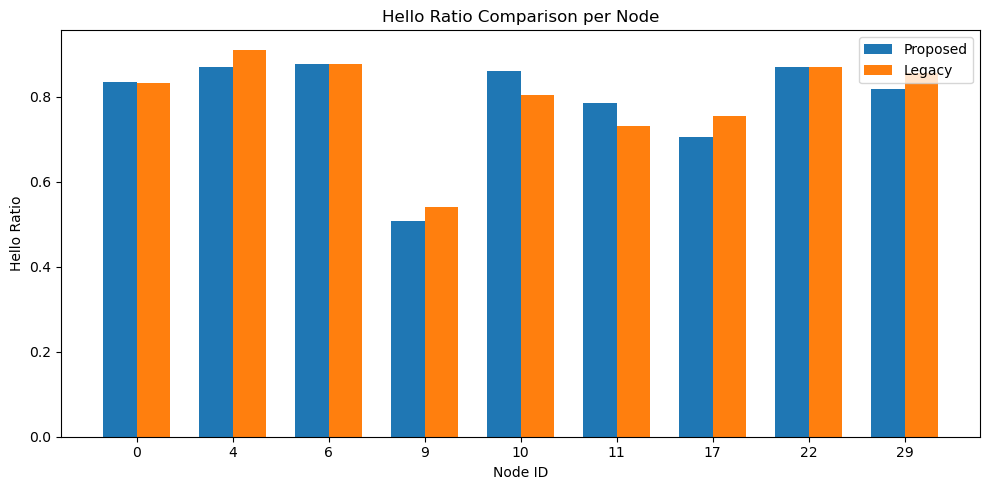

In [17]:
import os
import pandas as pd
import matplotlib.pyplot as plt

h_node = [0, 4, 6, 9, 10, 11, 17, 22, 29]

base_path_proposed = 'C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_04_25_AppSci_AODV_V02/P/D400/S30'
base_path_legacy   = 'C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_04_25_AppSci_AODV_V02/L/D400/S30'

def analyze_hello_send_log(base_path, node_list):
    result = {}
    for node in node_list:
        file_path = os.path.join(base_path, f"N{node}", "aodv_send_log.csv")
        print(f"Checking: {file_path}")
        if not os.path.isfile(file_path):
            print("  → 파일 없음")
            continue

        try:
            df = pd.read_csv(file_path, header=None)
            df.columns = ['Time', 'Node', 'PacketType', 'Field4', 'Field5',
                          'Field6', 'DestIP', 'Field8', 'Field9', 'Mode']

            df['Field5'] = df['Field5'].astype(str)
            df['PacketType'] = df['PacketType'].astype(str)

            hello_mask = df['Field5'] == 'HELLO'
            aodv_mask = df['PacketType'].str.contains('aodv::', na=False)

            hello_count = hello_mask.sum()
            total_count = aodv_mask.sum()
            hello_ratio = hello_count / total_count if total_count > 0 else 0

            result[node] = {
                'hello_count': hello_count,
                'total_aodv_send': total_count,
                'hello_ratio': hello_ratio
            }
            print(f"  → OK (hello={hello_count}, total={total_count})")
        except Exception as e:
            print(f"  → 예외 발생: {e}")
            continue

    return pd.DataFrame.from_dict(result, orient='index').sort_index()

df_proposed = analyze_hello_send_log(base_path_proposed, h_node)
df_legacy   = analyze_hello_send_log(base_path_legacy, h_node)

def plot_hello_comparison(df1, df2, metric='hello_ratio', label1='Proposed', label2='Legacy'):
    if metric not in df1.columns or metric not in df2.columns:
        print(f"'{metric}' 컬럼이 없음. 데이터 확인 필요.")
        return

    nodes = df1.index.astype(str)
    x = range(len(nodes))
    width = 0.35

    plt.figure(figsize=(10, 5))
    plt.bar([i - width/2 for i in x], df1[metric], width, label=label1)
    plt.bar([i + width/2 for i in x], df2[metric], width, label=label2)
    plt.xticks(x, nodes)
    plt.xlabel('Node ID')
    plt.ylabel(metric.replace('_', ' ').title())
    plt.title(f'{metric.replace("_", " ").title()} Comparison per Node')
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_hello_comparison(df_proposed, df_legacy, metric='hello_ratio')
